In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('hackathon.xlsx')
data['TIME_STAMP'] = pd.to_datetime(data['TIME_STAMP'])
data.head(5)


,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701


In [2]:
data['hour'] = data['TIME_STAMP'].dt.hour

server1 = data[data['SERVER_NAME'] == '10.0.901.xx Server 1']

hourly_traff = server1.groupby('hour').agg({'DOWNLOAD': 'sum', 'UPLOAD': 'sum'}).reset_index()

hourly_traff['TOTAL_TRAFFIC'] = hourly_traff['DOWNLOAD'] + hourly_traff['UPLOAD']

peak_hour = hourly_traff.sort_values(by='TOTAL_TRAFFIC', ascending=False).head(5)

print(peak_hour)

    hour      DOWNLOAD       UPLOAD  TOTAL_TRAFFIC
23    23  5.356470e+07  1370978.170   5.493567e+07
22    22  5.344110e+07  1404893.513   5.484599e+07
21    21  4.897507e+07  1306652.690   5.028172e+07
20    20  4.544316e+07  1193987.851   4.663714e+07
0      0  4.154549e+07  1043059.933   4.258855e+07


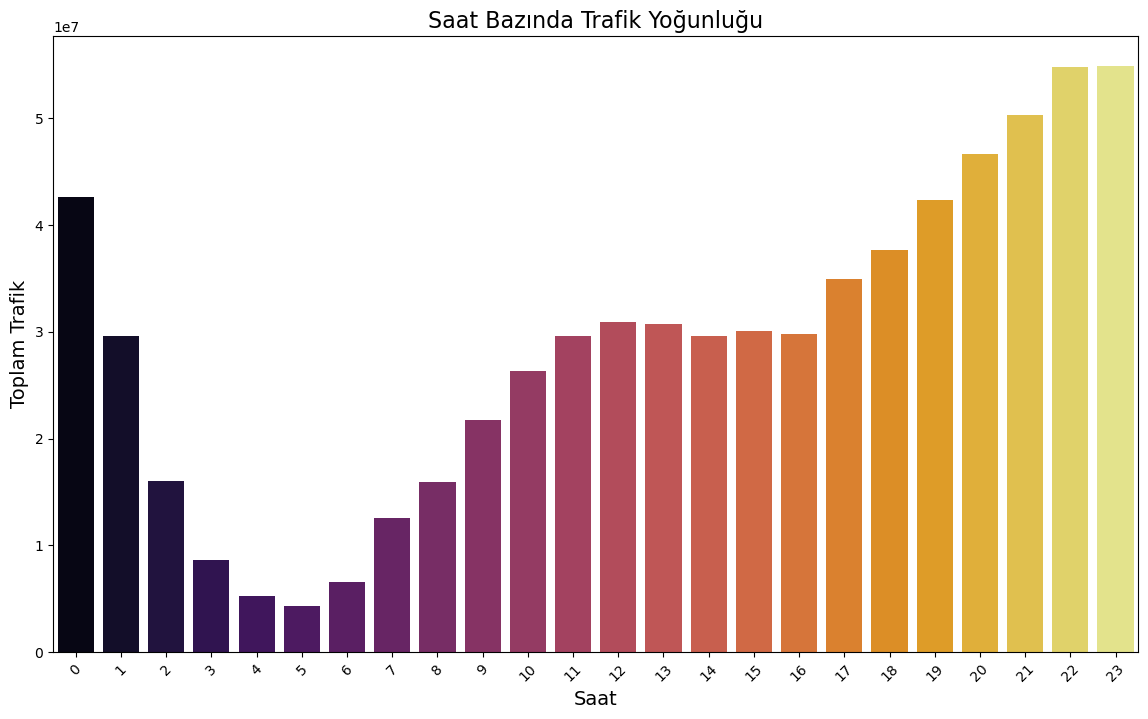

In [3]:
plt.figure(figsize=(14, 8))
sns.barplot(x='hour', y='TOTAL_TRAFFIC', data=hourly_traff, palette='inferno')
plt.title('Saat Bazında Trafik Yoğunluğu', fontsize=16)
plt.xlabel('Saat', fontsize=14)
plt.ylabel('Toplam Trafik', fontsize=14)
plt.xticks(rotation=45)
plt.show()




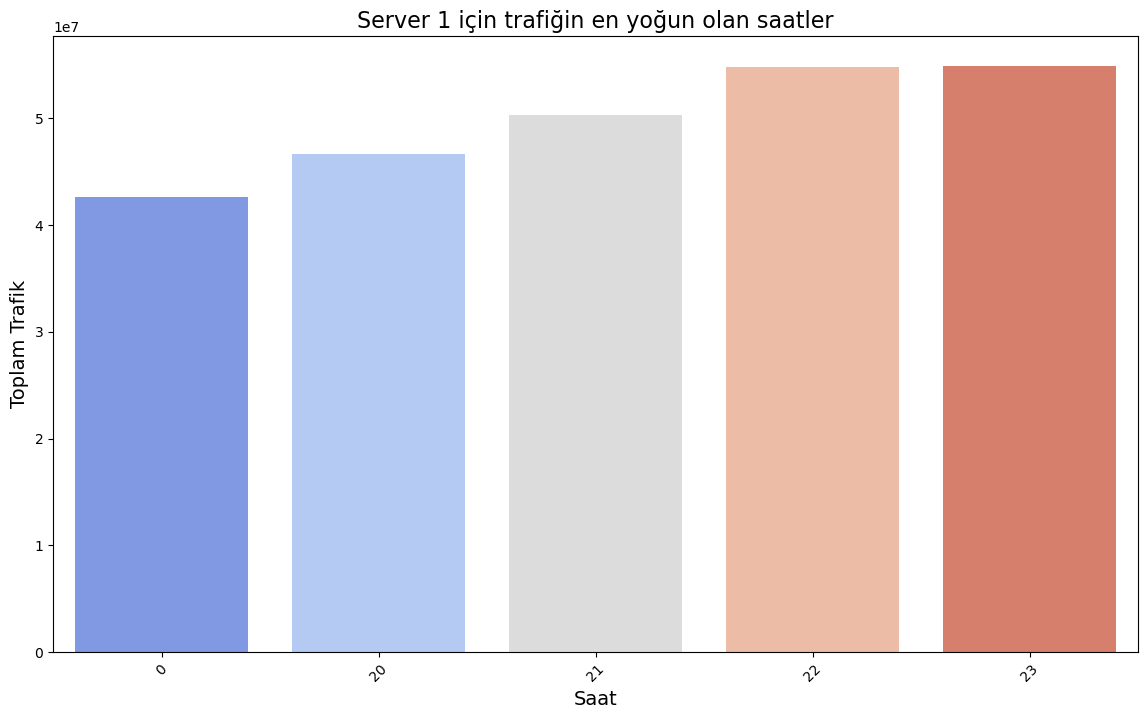

In [4]:
plt.figure(figsize=(14, 8))
sns.barplot(x='hour', y='TOTAL_TRAFFIC', data=peak_hour, palette='coolwarm')
plt.title('Server 1 için trafiğin en yoğun olan saatler', fontsize=16)
plt.xlabel('Saat', fontsize=14)
plt.ylabel('Toplam Trafik', fontsize=14)
plt.xticks(rotation=45)
plt.show()